### Thinking About Model Validation


#### Model validation the wrong way

In [1]:
from sklearn.datasets import load_iris
iris=load_iris()
X=iris.data
y=iris.target

In [7]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=1)

In [8]:
model.fit(X,y)
y_model=model.predict(X)

In [9]:
from sklearn.metrics import accuracy_score

In [10]:
accuracy_score(y,y_model)

1.0

#### Model validation the right way: Holdout sets

In [13]:
from sklearn.model_selection import train_test_split
#split data with 50% in each set
X1,X2,y1,y2=train_test_split(X,y, random_state=0,
                            train_size=0.5)

#fit the model on one set of data
model.fit(X1,y1)

#evaluate the model on the second set
y2_model=model.predict(X2)
accuracy_score(y2,y2_model)

0.9066666666666666

#### Model validation via cross-validation

In [14]:
y2_model=model.fit(X1,y1).predict(X2)
y1_model=model.fit(X2,y2).predict(X1)
accuracy_score(y1,y1_model), accuracy_score(y2,y2_model)

(0.96, 0.9066666666666666)

In [15]:
from sklearn.model_selection import cross_val_score
cross_val_score(model,X,y,cv=5)

array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ])

In [22]:
from sklearn.model_selection import LeaveOneOut
scores = cross_val_score(model, X, y, cv=LeaveOneOut())
scores

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [23]:
scores.mean()

0.96

#### Selecting the Best Model

###### Validation curves in Scikit-Learn


In [26]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2,**kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                        LinearRegression(**kwargs))

In [27]:
import numpy as np

def make_data(N,err=1.0,rseed=1):
    #randomly sample the data 
    rng=np.random.RandomState(rseed)
    X=rng.rand(N,1)**2
    y=10-1/(X.ravel()+0.1)
    if err>0:
        y+=err*rng.randn(N)
    return X,y

X,y=make_data(40)

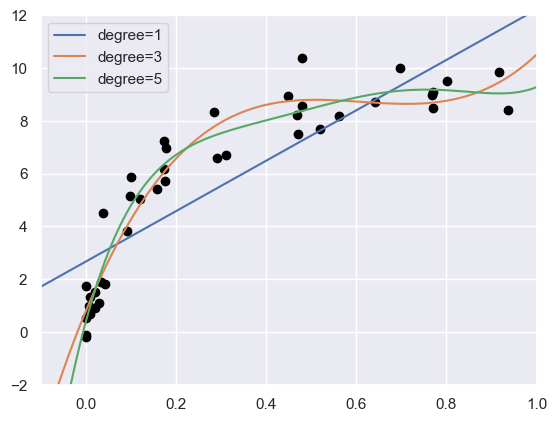

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns;
sns.set()

X_test=np.linspace(-0.1,1.1,500)[:,None]

plt.scatter(X.ravel(),y,color='black')
axis=plt.axis()
for degree in[1,3,5]:
    y_test=PolynomialRegression(degree).fit(X,y).predict(X_test)
    plt.plot(X_test.ravel(),y_test,label='degree={0}'.format(degree))
plt.xlim(-0.1,1.0)
plt.ylim(-2,12)
plt.legend(loc='best');

In [37]:
from sklearn.model_selection import validation_curve
degree=np.arange(0,21)
train_score,val_score=validation_curve(PolynomialRegression(),X,y,
                                       param_name='polynomialfeatures_degree',
                                       degree,cv=7)

plt.plot(degree,np.median(train_score,1), color='blue', label='training score')
plt.plot(degree, np.median(val_score,1), color='red',label='Variance Score')
plt.legend(loc='lower left')
plt.ylim(0,1)
plt.xlabel('degree')
plt.ylabel('score');

SyntaxError: positional argument follows keyword argument (2199217447.py, line 5)

In [31]:
validation_curve?